In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import DotsGeneticAlgorithmState
from src.baseline import BaselineGeneticAlgorithm
from src.crossovers import mean_crossover
from src.mutations import square_mutation

In [2]:
POPULATION_SIZE = 1000
DIMENSION_SIZE = 2
CONSTRAINTS = (-4, 4)
RANDOM_STATE = 100

In [3]:
current_state = DotsGeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

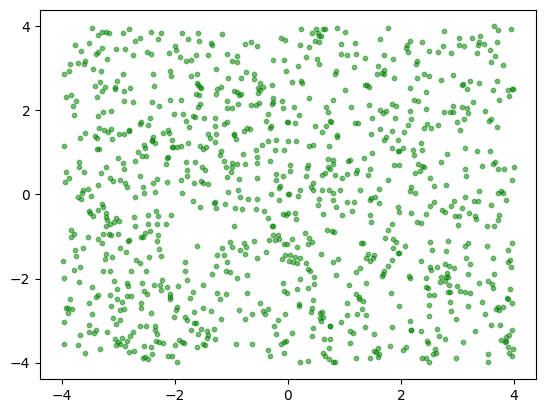

In [4]:
x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [5]:
from typing import Sequence


def function_1(pop: Sequence[float]):
    first = np.power(pop - 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

def function_2(pop: Sequence[float]):
    first = np.power(pop + 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

function_1([3, 4])
function_2([3, 4])

0.9999999999999998

In [6]:
algo = BaselineGeneticAlgorithm(
    state=current_state,
    eval_functions=[function_1, function_2],
    mutation_function=square_mutation,
    mating_function=mean_crossover,
)

In [7]:
algo.get_best()

[[0.004914555543625632, -0.4385869693508937],
 [0.1749743825967176, -0.033424112770636505],
 [0.014508749484249073, 0.01380897353291477],
 [-0.9519418351435753, -0.7541237394188087],
 [0.005672946670356893, 0.007116033229406682],
 [-0.16605614502530397, -0.14266383610231603],
 [-0.5547054803424682, -0.1029704705629797],
 [-0.08541292187194571, -0.46462984600580803],
 [0.4427871546510289, 0.2842384589412932],
 [-0.8147553611786753, -0.3400983102484112],
 [-0.026884259737486538, -0.49029002486900275],
 [-0.4266770406261893, -0.40479311225193015],
 [0.44334495251367745, 0.09490786549054331],
 [0.7026784237250494, 0.643373693708921],
 [-0.35321300040311066, -0.5576775669833527],
 [0.3992087567170106, 0.17569926768251065],
 [0.6019394575561119, 0.47128293893796336],
 [0.35233885219922545, 0.6968070554275281],
 [0.65575835034499, 0.4989145829059458],
 [0.3174727866189917, 0.4277093127567433],
 [0.20925738041690067, 0.1168486949838945],
 [0.3452551245628026, 0.6216321634843869]]

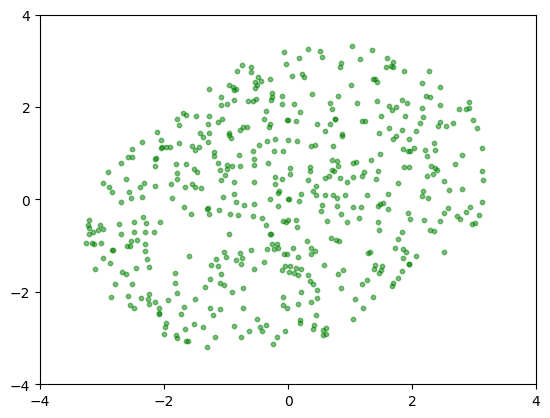

In [8]:
algo.select(keep_share=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

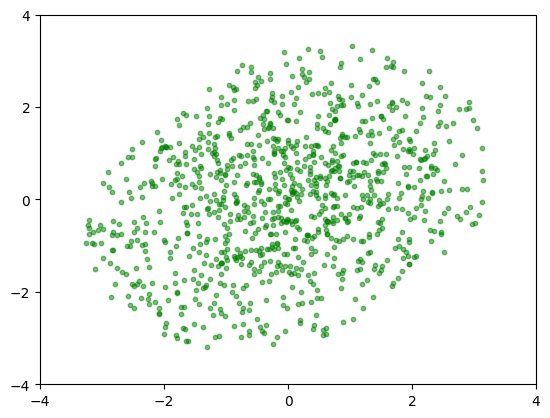

In [9]:
algo.mate()

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

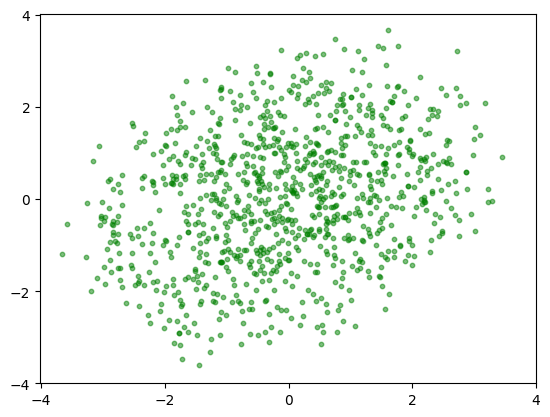

In [10]:
algo.mutate(delta=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [11]:
algo.get_best()

[[-0.3502467391553894, -0.3240112432196377],
 [-0.6128321750694987, -0.4853467030310753],
 [0.4983494129680308, 0.5160645672627182],
 [-0.7257436058063745, -0.5344098216424331],
 [0.5212034937566657, 0.7286195082298874],
 [0.5572735700350354, 0.5798353785630898],
 [-0.4616072429789638, -0.4505594569505864],
 [0.41465913935673426, 0.47710372520603417],
 [-0.28965984576304116, -0.31546077855057764],
 [-0.13362165368202916, 0.044015159462755804],
 [0.7496858441475722, 0.6860141220163807],
 [0.6371859442276064, 0.7413317247335942],
 [-0.15923103799788718, -0.25097486473863073],
 [0.37029085143191187, 0.30463996661062653],
 [0.45736442000882827, 0.49183251716737475],
 [-0.3265628801027751, 0.006860844528049803],
 [0.6999322087210085, 0.6184437886982619],
 [0.22128152369589404, 0.22310837877790846],
 [0.35781276627222436, 0.11760380674923532],
 [0.05899251147815532, 0.2911067819538542],
 [0.04176604989012489, -0.22631026414582767],
 [0.05714198385468805, 0.16301310349700193],
 [-0.0223695509

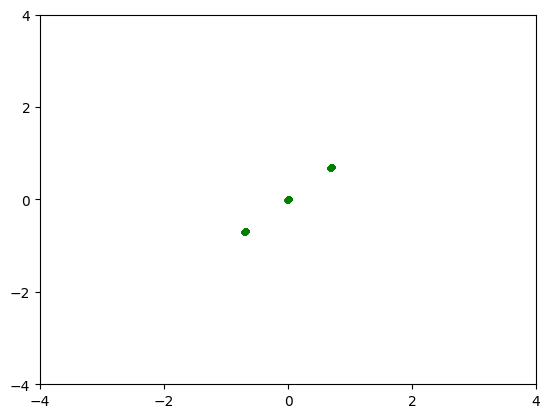

In [12]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [13]:
algo.get_best()

[[-0.6842865849951593, -0.6847460445256571],
 [-0.6822500680009377, -0.6842181763245969],
 [0.6983986559477676, 0.697142578878316],
 [-0.6857324821317501, -0.6853650693864487],
 [0.703726875212087, 0.7025438145440576],
 [0.7039174793241544, 0.7051251747300907],
 [-0.6789834108495423, -0.686256202785109],
 [-0.6829245292621363, -0.6871804683414247],
 [-0.6874805818609332, -0.6897474870056833],
 [0.6900762808534252, 0.6907830935418774],
 [0.6967712471123684, 0.6982806829707917],
 [0.6846810560113835, 0.6861002950890611],
 [0.7015763478432692, 0.7017650424503042],
 [-0.6904315557180091, -0.6894062587994162],
 [-0.6873619034847515, -0.6851782066710181],
 [0.6830874877615144, 0.6857828569410168],
 [-0.6864529212330266, -0.6859858681707748],
 [-0.6933619928889451, -0.6914140775781967],
 [0.6982844980118789, 0.6989565250814117],
 [0.6963655389257276, 0.6954125684605319],
 [-0.6774426372929936, -0.6827799171793509],
 [-0.683525469299223, -0.684283840179216],
 [-0.6779066314788688, -0.683771517